# pol dataset 

In [1]:
# Imports
import os
import sys
BASE_DIR = os.path.dirname(os.getcwd())
sys.path.append(BASE_DIR)
import torch
import numpy as np
import pandas as pd

# Opendataval
from dataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise, add_uniform_noise
from dataval.datavaluation import NDDV, NDSV
from dataval.experiment import ExperimentMediator

import warnings
warnings.filterwarnings("ignore")

[KeOps] Compiling cuda jit compiler engine ... 
[KeOps] Warning : There were warnings or errors compiling formula :
In file included from /home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp:21:
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp: In function ‘int Compile(const char*, const char*, int, int, const char*)’:
<command-line>: error: ‘nvrtcGetCUBINSize’ was not declared in this scope; did you mean ‘nvrtcGetPTXSize’?
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/include/utils_pe.h:6:26: note: in definition of macro ‘NVRTC_SAFE_CALL’
    6 |     nvrtcResult result = x;                                       \
      |                          ^
/home/kunyu/anaconda3/envs/zyliang/lib/python3.10/site-packages/keopscore/binders/nvrtc/nvrtc_jit.cpp:90:21: note: in expansion of macro ‘nvrtcGetTARGETSize’
   90 |     NVRTC_SAFE_CALL(nvrtcGetTARGETSize(prog, &t

In [2]:
DataFetcher.datasets_available()

{'2dplanes',
 'MiniBooNE',
 'adult',
 'bbc',
 'bbc-embeddings',
 'breast_cancer',
 'challenge-iris',
 'cifar10',
 'cifar10-embeddings',
 'cifar100',
 'cifar100-embeddings',
 'creditcard',
 'diabetes',
 'digits',
 'echoMonths',
 'election',
 'electricity',
 'fashion',
 'fmnist-embeddings',
 'fried',
 'gaussian_classifier',
 'gaussian_classifier_high_dim',
 'imdb',
 'imdb-embeddings',
 'iris',
 'linnerud',
 'lowbwt',
 'mnist',
 'mnist-embeddings',
 'mv',
 'nomao',
 'pol',
 'stl10-embeddings',
 'stock',
 'svhn-embeddings',
 'vehicle_sensIT',
 'wave_energy',
 'webdata_wXa'}

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "pol"
train_count, valid_count, test_count, meta_count = 1000, 100, 300, 100
noise_rate = 0.1
noise_kwargs = {'noise_rate': noise_rate}
max_epoch = 3
batch_size = 32
lr = 0.01
random_state = 42
train_kwargs = {"epochs": max_epoch, "batch_size": batch_size, "lr": lr}
model_name = "classifiermlp"  
# model_name = "LogisticRegression"
metric_name = "accuracy"
cache_dir = "../data_files/"
add_noise = add_gauss_noise
noise_type = "gauss_noise"
device = 'cpu'

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=cache_dir,  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    meta_count=meta_count,
    add_noise=add_noise, 
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    random_state = random_state,
    model_name=model_name,
    metric_name=metric_name,
    device=device
)

Base line model metric_name='accuracy': perf=0.95333331823349


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [NDSV(mfg_epochs=50, base_model=model_name, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=batch_size, weight_decay=5e-4, meta_weight_decay=1e-4, meta_hidden_size=10)]

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:00<00:21,  2.33it/s]

Epoch: 0, Test Accuracy: 71.67%


  4%|▍         | 2/50 [00:00<00:21,  2.20it/s]

Epoch: 1, Test Accuracy: 83.67%


  6%|▌         | 3/50 [00:01<00:21,  2.19it/s]

Epoch: 2, Test Accuracy: 83.67%


  8%|▊         | 4/50 [00:01<00:20,  2.23it/s]

Epoch: 3, Test Accuracy: 86.00%


 10%|█         | 5/50 [00:02<00:19,  2.31it/s]

Epoch: 4, Test Accuracy: 85.67%


 12%|█▏        | 6/50 [00:02<00:18,  2.36it/s]

Epoch: 5, Test Accuracy: 83.00%


 14%|█▍        | 7/50 [00:03<00:17,  2.39it/s]

Epoch: 6, Test Accuracy: 89.33%


 16%|█▌        | 8/50 [00:03<00:17,  2.42it/s]

Epoch: 7, Test Accuracy: 87.33%


 18%|█▊        | 9/50 [00:03<00:16,  2.43it/s]

Epoch: 8, Test Accuracy: 87.00%


 20%|██        | 10/50 [00:04<00:16,  2.44it/s]

Epoch: 9, Test Accuracy: 84.00%


 22%|██▏       | 11/50 [00:04<00:15,  2.44it/s]

Epoch: 10, Test Accuracy: 83.33%


 24%|██▍       | 12/50 [00:05<00:15,  2.45it/s]

Epoch: 11, Test Accuracy: 86.33%


 26%|██▌       | 13/50 [00:05<00:15,  2.45it/s]

Epoch: 12, Test Accuracy: 87.67%


 28%|██▊       | 14/50 [00:05<00:14,  2.43it/s]

Epoch: 13, Test Accuracy: 89.33%


 30%|███       | 15/50 [00:06<00:16,  2.12it/s]

Epoch: 14, Test Accuracy: 88.67%


 32%|███▏      | 16/50 [00:06<00:15,  2.20it/s]

Epoch: 15, Test Accuracy: 89.00%


 34%|███▍      | 17/50 [00:07<00:14,  2.27it/s]

Epoch: 16, Test Accuracy: 85.67%


 36%|███▌      | 18/50 [00:07<00:13,  2.31it/s]

Epoch: 17, Test Accuracy: 89.00%


 38%|███▊      | 19/50 [00:08<00:13,  2.36it/s]

Epoch: 18, Test Accuracy: 90.33%


 40%|████      | 20/50 [00:08<00:12,  2.39it/s]

Epoch: 19, Test Accuracy: 90.67%


 42%|████▏     | 21/50 [00:08<00:12,  2.41it/s]

Epoch: 20, Test Accuracy: 90.33%


 44%|████▍     | 22/50 [00:09<00:11,  2.40it/s]

Epoch: 21, Test Accuracy: 89.33%


 46%|████▌     | 23/50 [00:09<00:11,  2.40it/s]

Epoch: 22, Test Accuracy: 89.33%


 48%|████▊     | 24/50 [00:10<00:10,  2.42it/s]

Epoch: 23, Test Accuracy: 92.33%


 50%|█████     | 25/50 [00:10<00:10,  2.42it/s]

Epoch: 24, Test Accuracy: 91.33%


 52%|█████▏    | 26/50 [00:11<00:10,  2.33it/s]

Epoch: 25, Test Accuracy: 92.67%


 54%|█████▍    | 27/50 [00:11<00:10,  2.28it/s]

Epoch: 26, Test Accuracy: 91.67%


 56%|█████▌    | 28/50 [00:11<00:09,  2.25it/s]

Epoch: 27, Test Accuracy: 90.67%


 58%|█████▊    | 29/50 [00:12<00:09,  2.22it/s]

Epoch: 28, Test Accuracy: 90.67%


 60%|██████    | 30/50 [00:12<00:09,  2.21it/s]

Epoch: 29, Test Accuracy: 91.00%


 62%|██████▏   | 31/50 [00:13<00:08,  2.19it/s]

Epoch: 30, Test Accuracy: 89.33%


 64%|██████▍   | 32/50 [00:13<00:08,  2.18it/s]

Epoch: 31, Test Accuracy: 89.00%


 66%|██████▌   | 33/50 [00:14<00:07,  2.18it/s]

Epoch: 32, Test Accuracy: 93.33%


 68%|██████▊   | 34/50 [00:14<00:07,  2.17it/s]

Epoch: 33, Test Accuracy: 92.00%


 70%|███████   | 35/50 [00:15<00:06,  2.17it/s]

Epoch: 34, Test Accuracy: 91.33%


 72%|███████▏  | 36/50 [00:15<00:06,  2.17it/s]

Epoch: 35, Test Accuracy: 91.33%


 74%|███████▍  | 37/50 [00:16<00:05,  2.25it/s]

Epoch: 36, Test Accuracy: 89.00%


 76%|███████▌  | 38/50 [00:16<00:05,  2.29it/s]

Epoch: 37, Test Accuracy: 93.33%


 78%|███████▊  | 39/50 [00:16<00:04,  2.33it/s]

Epoch: 38, Test Accuracy: 88.00%


 80%|████████  | 40/50 [00:17<00:04,  2.34it/s]

Epoch: 39, Test Accuracy: 92.33%


 82%|████████▏ | 41/50 [00:17<00:03,  2.37it/s]

Epoch: 40, Test Accuracy: 93.33%


 84%|████████▍ | 42/50 [00:18<00:03,  2.39it/s]

Epoch: 41, Test Accuracy: 93.00%


 86%|████████▌ | 43/50 [00:18<00:02,  2.39it/s]

Epoch: 42, Test Accuracy: 91.67%


 88%|████████▊ | 44/50 [00:18<00:02,  2.42it/s]

Epoch: 43, Test Accuracy: 88.67%


 90%|█████████ | 45/50 [00:19<00:02,  2.43it/s]

Epoch: 44, Test Accuracy: 93.00%


 92%|█████████▏| 46/50 [00:19<00:01,  2.44it/s]

Epoch: 45, Test Accuracy: 92.00%


 94%|█████████▍| 47/50 [00:20<00:01,  2.43it/s]

Epoch: 46, Test Accuracy: 85.67%


 96%|█████████▌| 48/50 [00:20<00:00,  2.43it/s]

Epoch: 47, Test Accuracy: 93.00%


 98%|█████████▊| 49/50 [00:21<00:00,  2.44it/s]

Epoch: 48, Test Accuracy: 88.67%


100%|██████████| 50/50 [00:21<00:00,  2.33it/s]

Epoch: 49, Test Accuracy: 93.00%


Elapsed time NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10): 0:00:21.650884
CPU times: user 11min 20s, sys: 983 ms, total: 11min 21s
Wall time: 21.7 s


## [Step 3] Evaluate data values

In [6]:
from dataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    remove_high_value,
    remove_low_value,
    add_low_high,
    add_high_value,
    add_low_value,
    save_dataval
)
from matplotlib import pyplot as plt

In [7]:
# Saving the results with percent 5%
percent = 0.05
output_dir = f"../results/NDDV_{device}_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_cpu_pol_classifiermlp_gauss_noise_noise_rate=0.1_train_count=1000_percent=0.05/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [8]:
exper_med.evaluate(noisy_detection, save_output=True)

[227 328 946 766 332 315  56 861 149 579   4 459 933 769 786 194 932 118
 522   3 630 833 224 849 221 299  84 690 590 628  50 364 499 648  90 322
 637 375 211 507  38 356 738 524 250 191 986   5  44 249 694 703 723 742
 811 977 827 527 675 735  24 111 720 106 301 414 604 927 273 593 391 762
 272 491 503 395 102 167  98 671 909 591 450 673 601 361 626 279 962 782
 416  71  93 335 672 733 326 344 581 228 348]
[424  53 673  71 480 637 825 601 111 318 395 491 361 707 985 775  98 180
  88  93  37 283 503 301 348 486 593  38 747 785 988 279 982 416 803 236
 541 909 733 591 224 273 354 102 581 485  24 762 879 450 174 290 499 771
 228 410 535 615 375 735 681 573 626 671 782 962   0 231 860   3 322 323
  90 672 138 167 600 786 204 740 507 955 990 364 659 393 768 391 266 621
 927  87 278 856 587 809 799  84 653 891]
46 55 54


,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.457711


### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

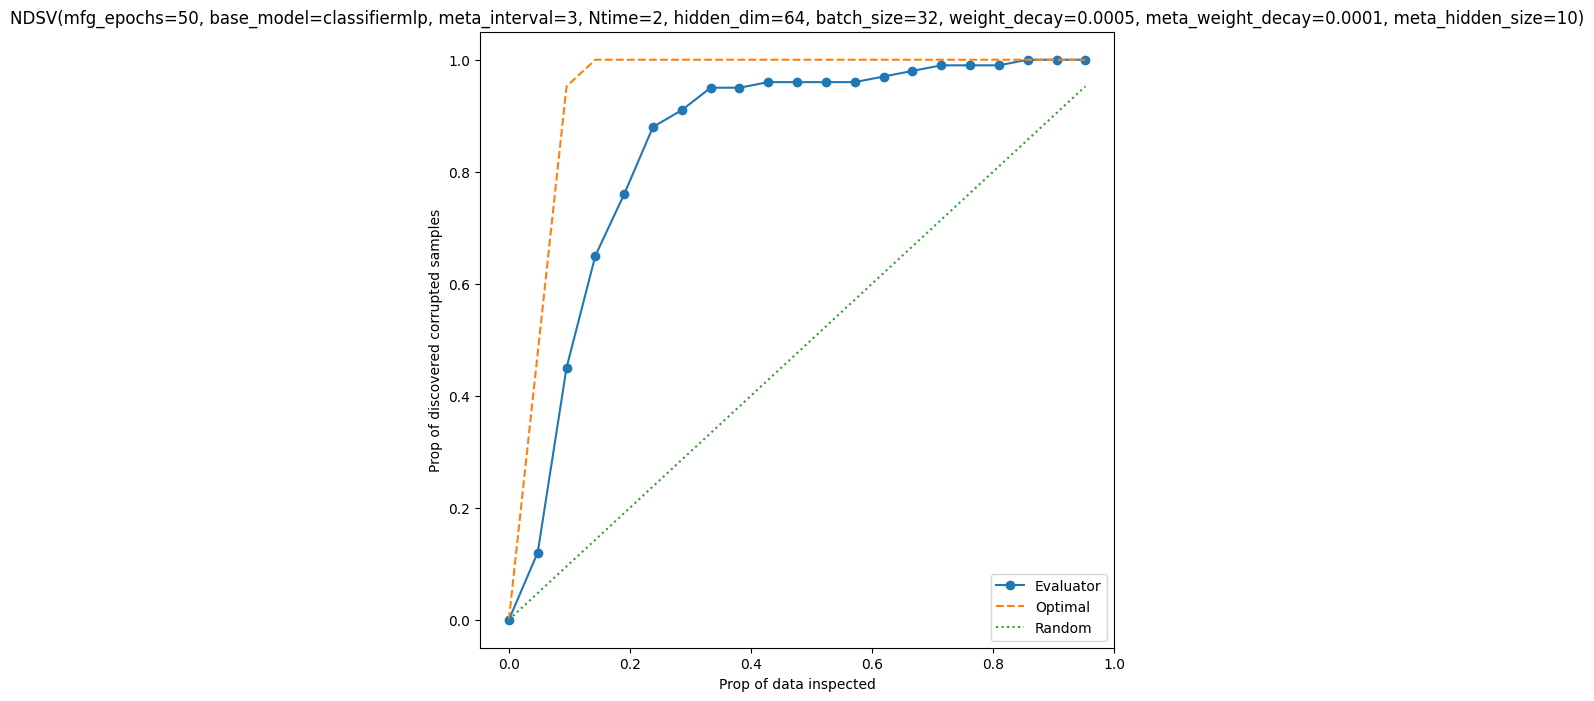

In [9]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

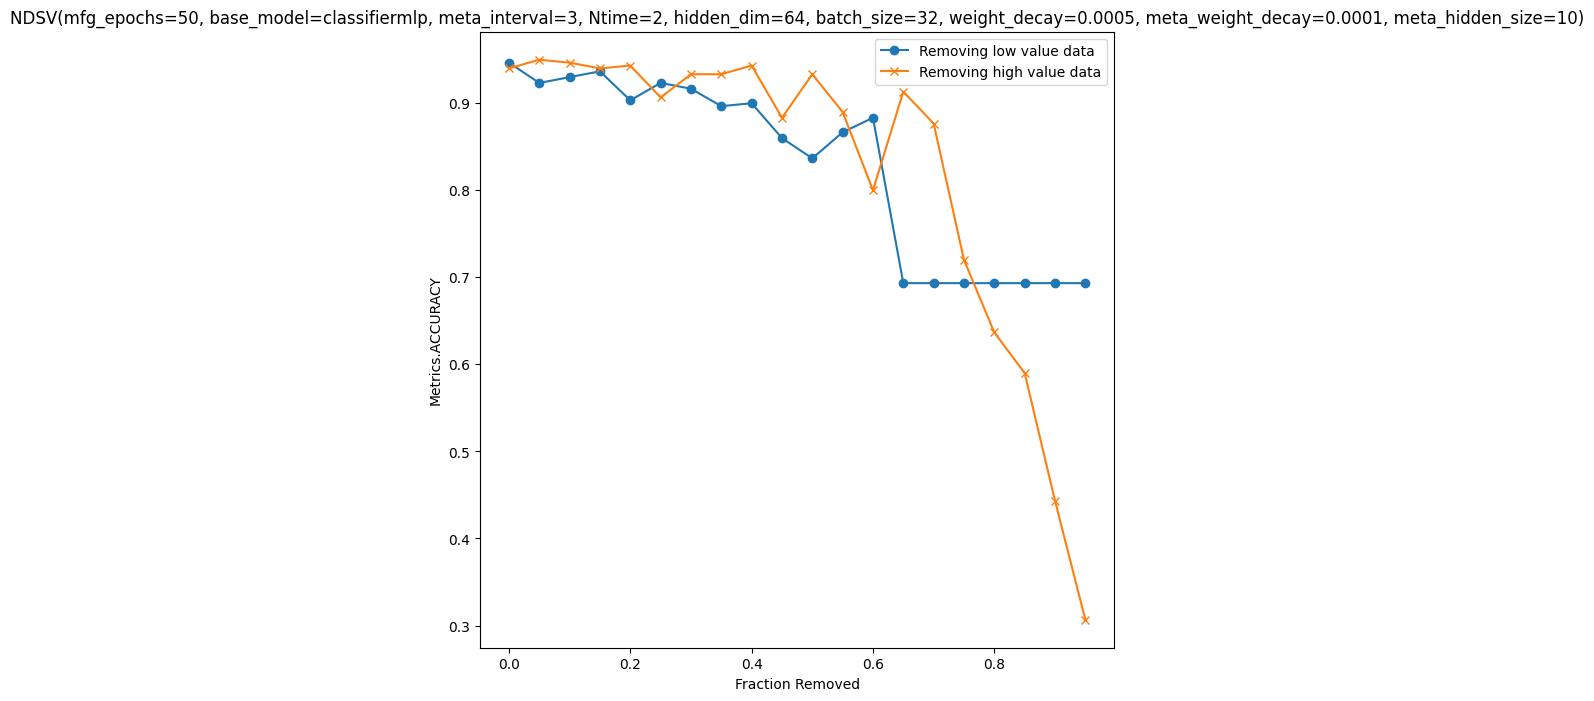

In [10]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

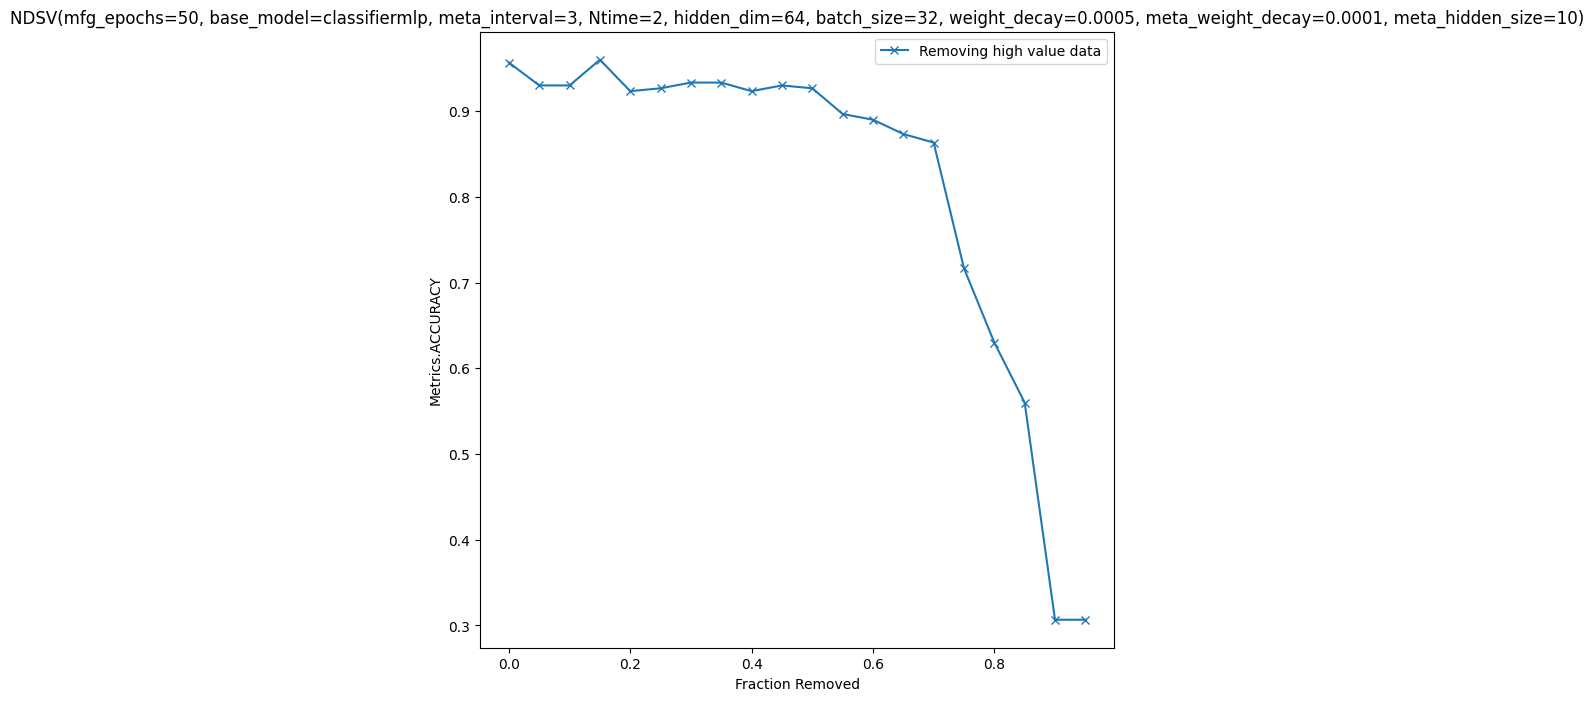

In [11]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

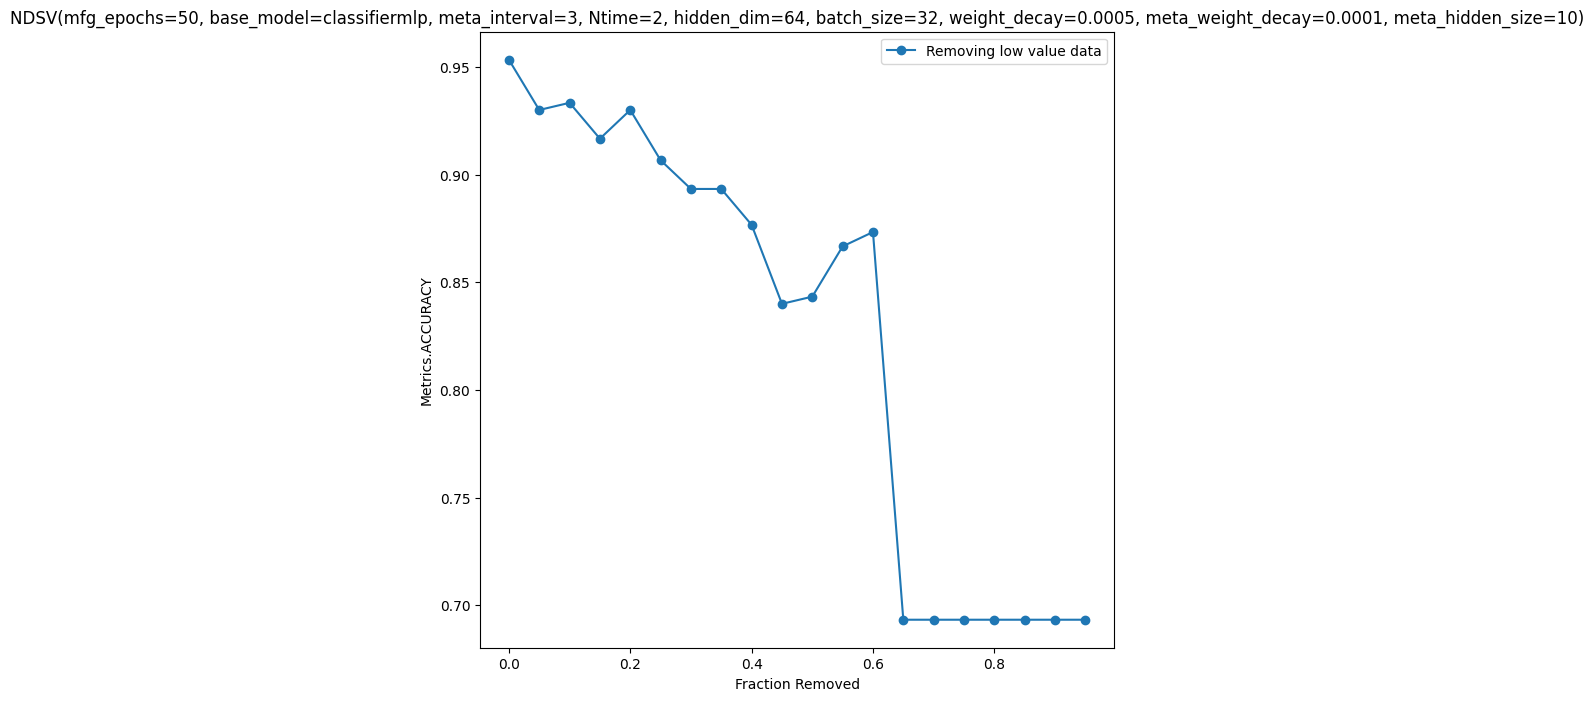

In [12]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

In [13]:
df_resp # it provides complete information for generating point-removal experiment figures.

,remove_least_influential_first_Metrics.ACCURACY,remove_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.946667,0.94,0.0
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.923333,0.95,0.05
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.93,0.946667,0.1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.936667,0.94,0.15
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.903333,0.943333,0.2
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.923333,0.906667,0.25
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.916667,0.933333,0.3
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.896667,0.933333,0.35
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.9,0.943333,0.4
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.86,0.883333,0.45


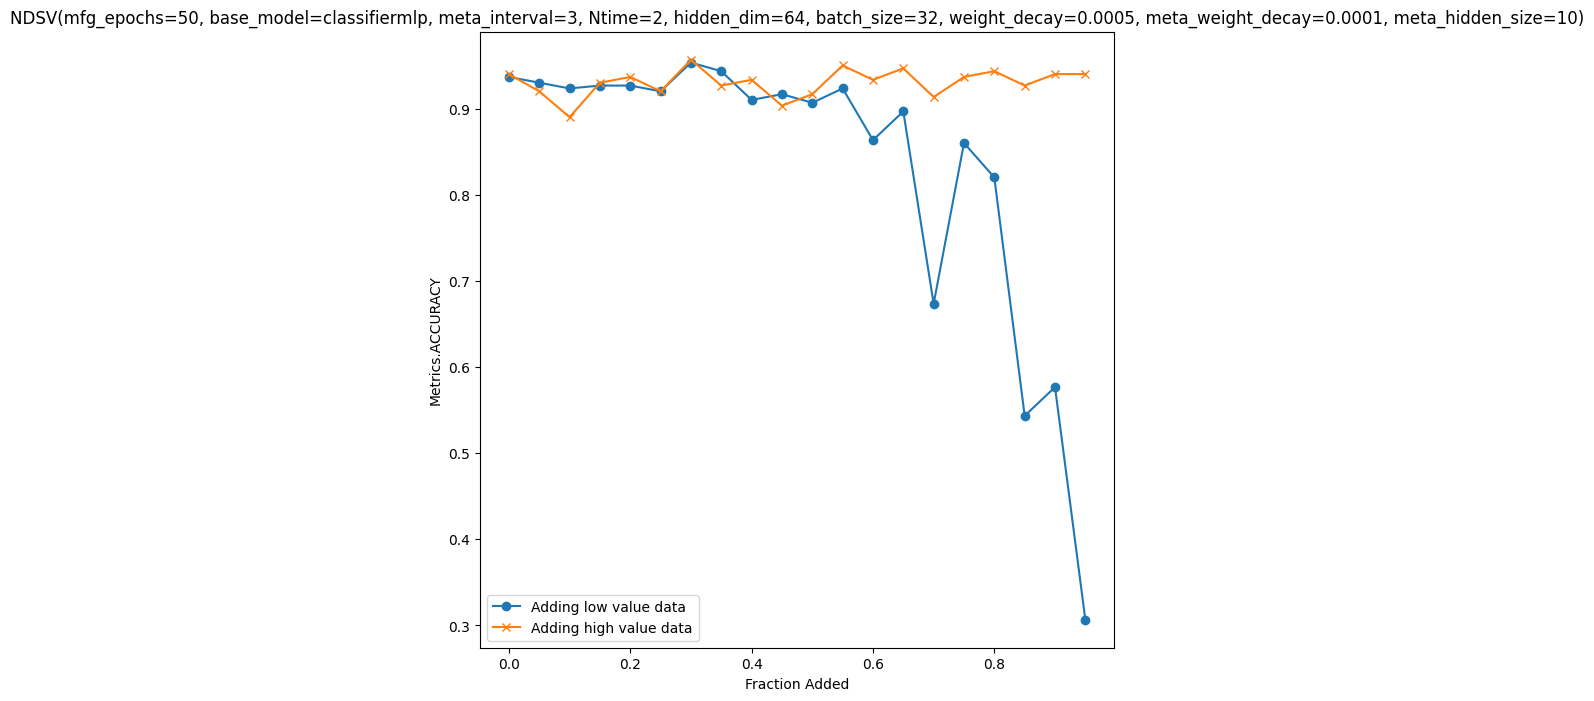

In [14]:
fig = plt.figure(figsize=(18, 8))
df_addp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

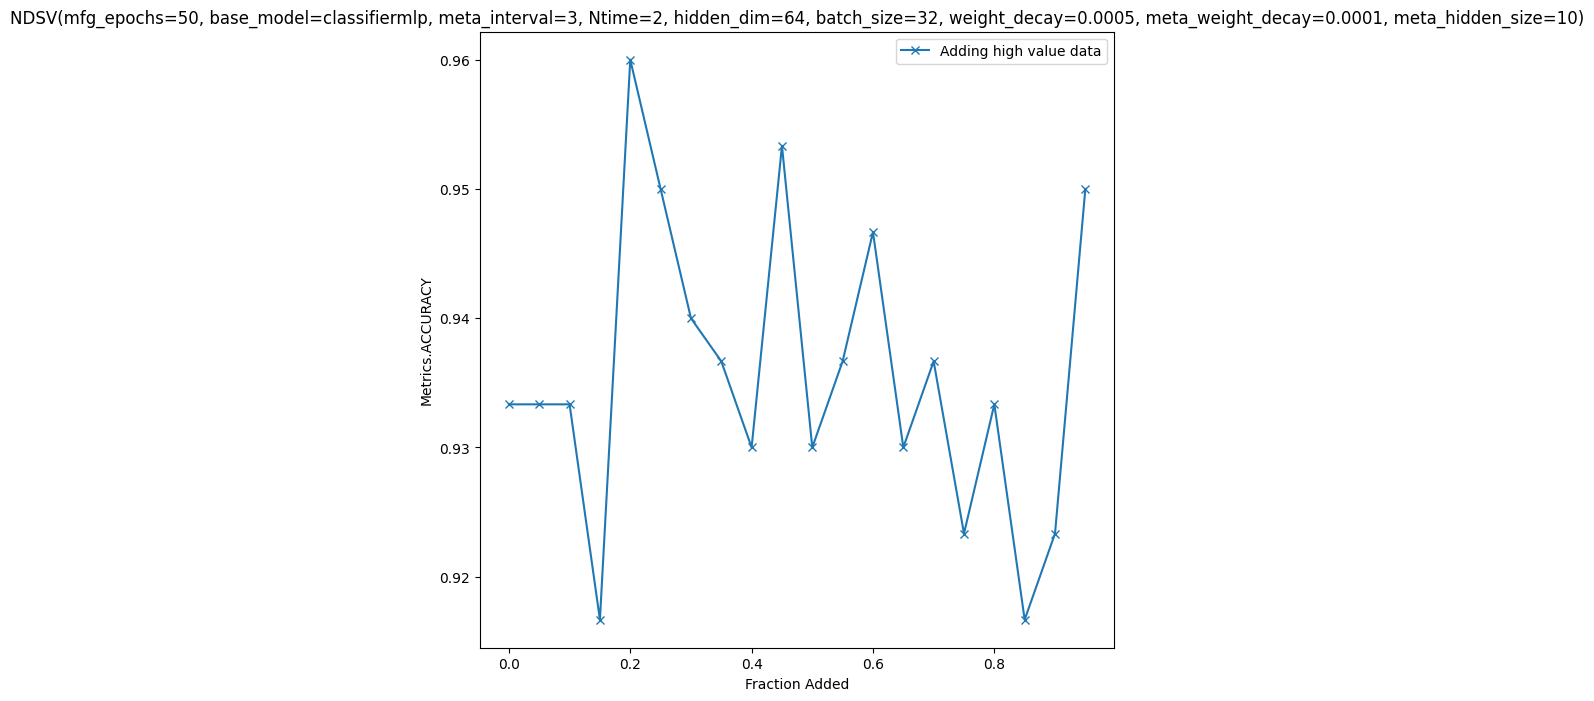

In [15]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

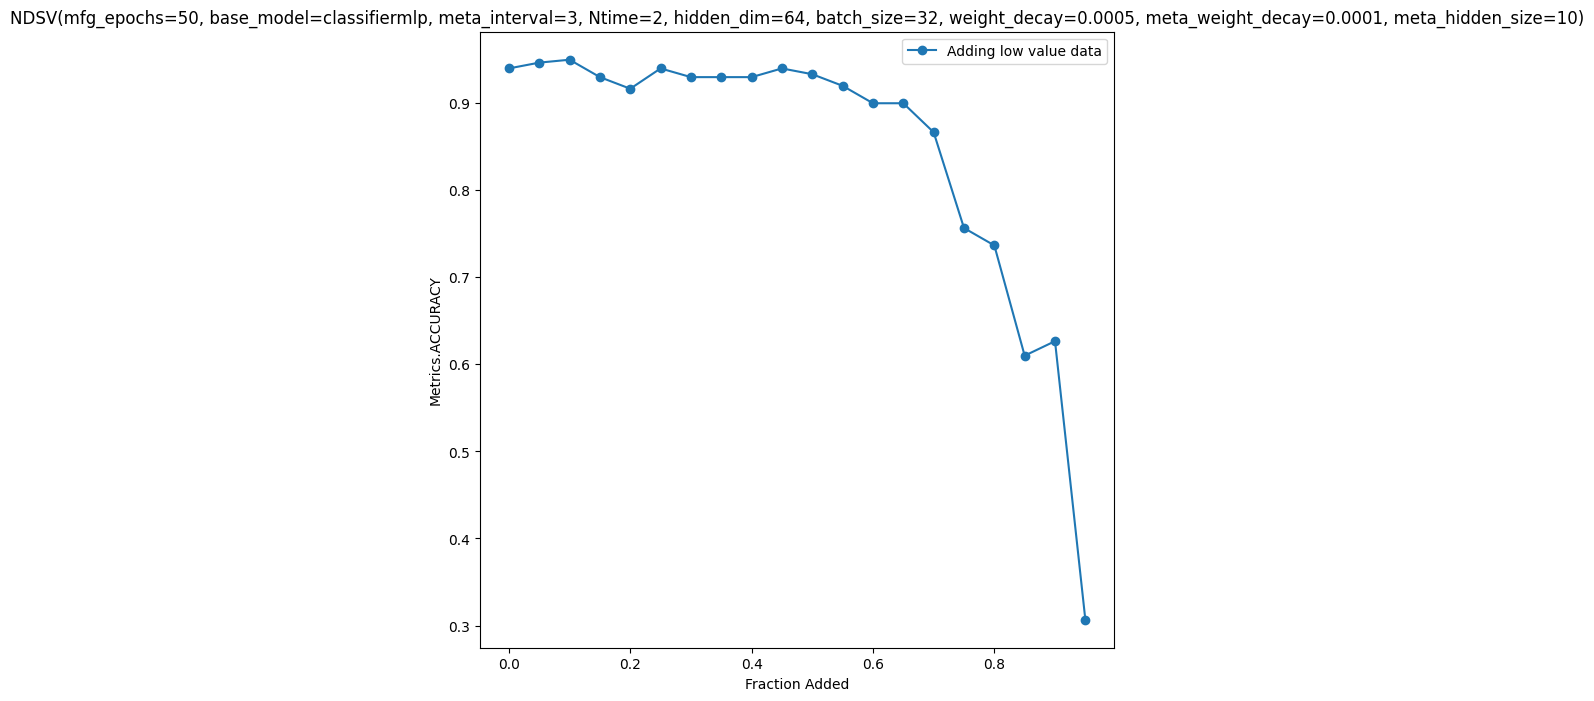

In [16]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)

In [17]:
df_addp

,add_least_influential_first_Metrics.ACCURACY,add_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.306667,0.94,0.95
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.576667,0.94,0.9
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.543333,0.926667,0.85
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.82,0.943333,0.8
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.86,0.936667,0.75
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.673333,0.913333,0.7
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.896667,0.946667,0.65
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.863333,0.933333,0.6
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.923333,0.95,0.55
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.906667,0.916667,0.5


### Save data values
- `save_dataval` stores computed data values at `{output_dir}/save_dataval.csv`.

In [18]:
exper_med.evaluate(save_dataval, save_output=True)

,indices,data_values
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",8765,0.000202
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",9158,0.002095
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",8093,0.002082
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",10074,-0.015512
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",2894,-0.027485
...,...,...
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",13032,0.024134
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",5838,0.025458
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",1086,0.025557
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",6444,0.025377


### percent is 0.1

In [19]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_{device}_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_cpu_pol_classifiermlp_gauss_noise_noise_rate=0.1_train_count=1000_percent=0.1/'

In [20]:
exper_med.evaluate(noisy_detection, save_output=True)

[227 328 946 766 332 315  56 861 149 579   4 459 933 769 786 194 932 118
 522   3 630 833 224 849 221 299  84 690 590 628  50 364 499 648  90 322
 637 375 211 507  38 356 738 524 250 191 986   5  44 249 694 703 723 742
 811 977 827 527 675 735  24 111 720 106 301 414 604 927 273 593 391 762
 272 491 503 395 102 167  98 671 909 591 450 673 601 361 626 279 962 782
 416  71  93 335 672 733 326 344 581 228 348]
[424  53 673  71 480 637 825 601 111 318 395 491 361 707 985 775  98 180
  88  93  37 283 503 301 348 486 593  38 747 785 988 279 982 416 803 236
 541 909 733 591 224 273 354 102 581 485  24 762 879 450 174 290 499 771
 228 410 535 615 375 735 681 573 626 671 782 962   0 231 860   3 322 323
  90 672 138 167 600 786 204 740 507 955 990 364 659 393 768 391 266 621
 927  87 278 856 587 809 799  84 653 891]
46 55 54


,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=3, Ntime=2, hidden_dim=64, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.457711


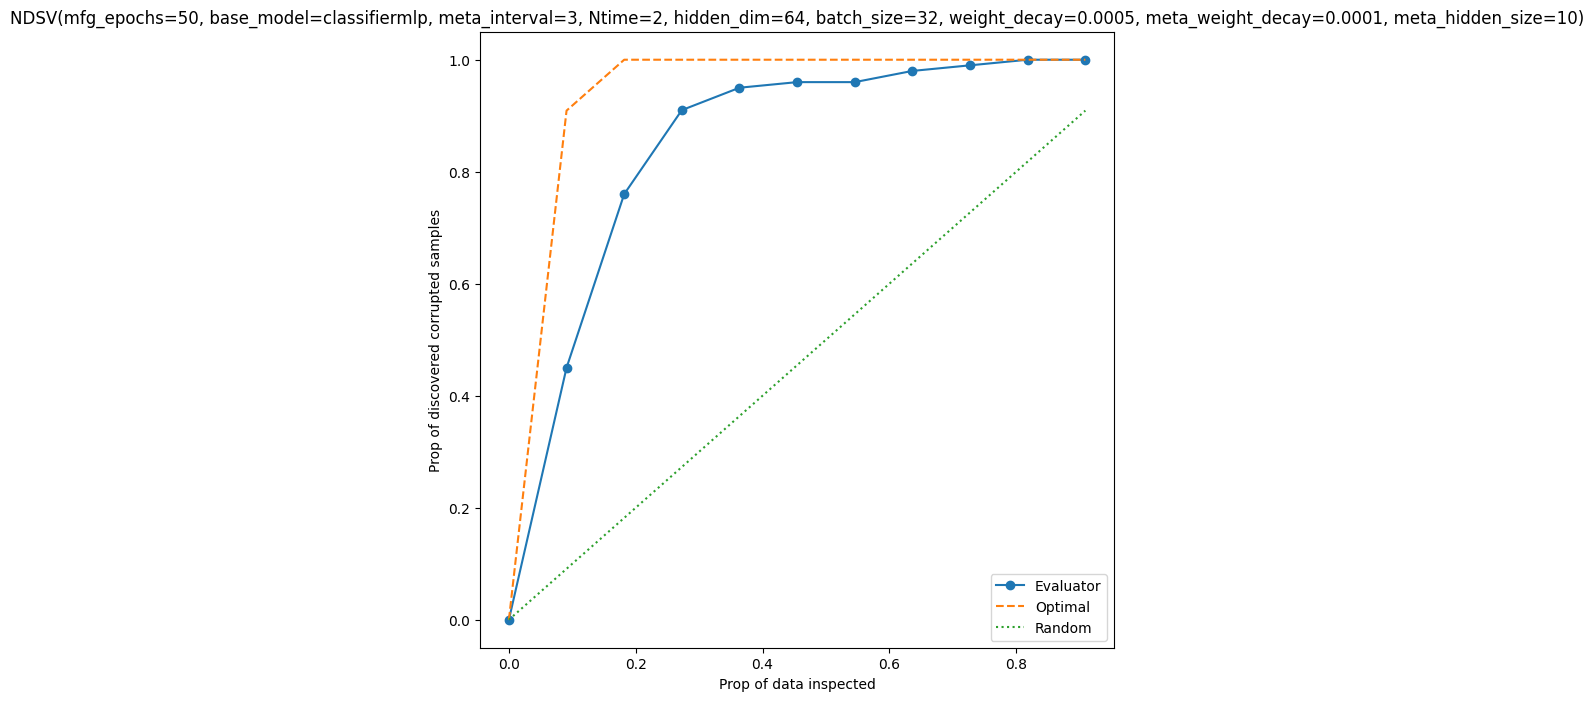

In [21]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

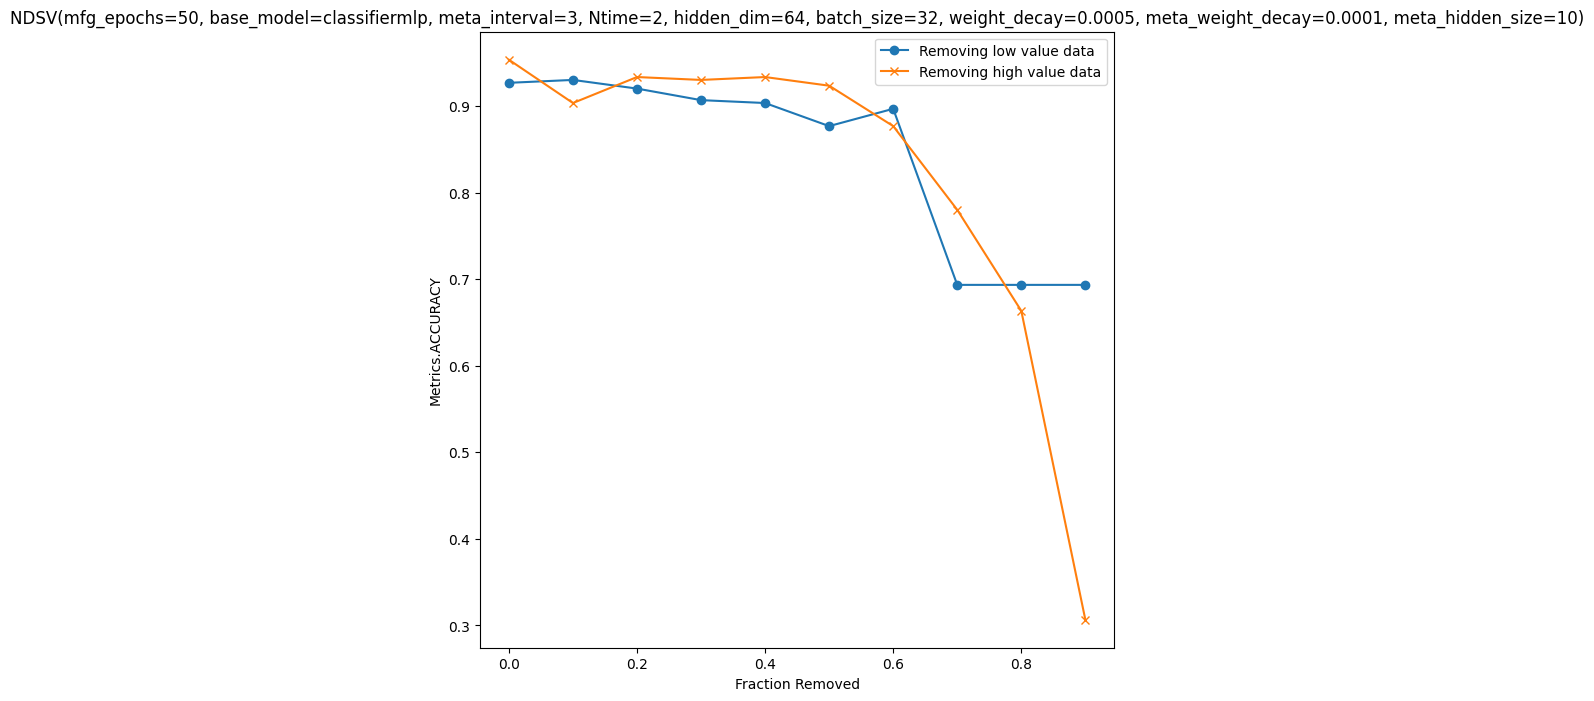

In [22]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

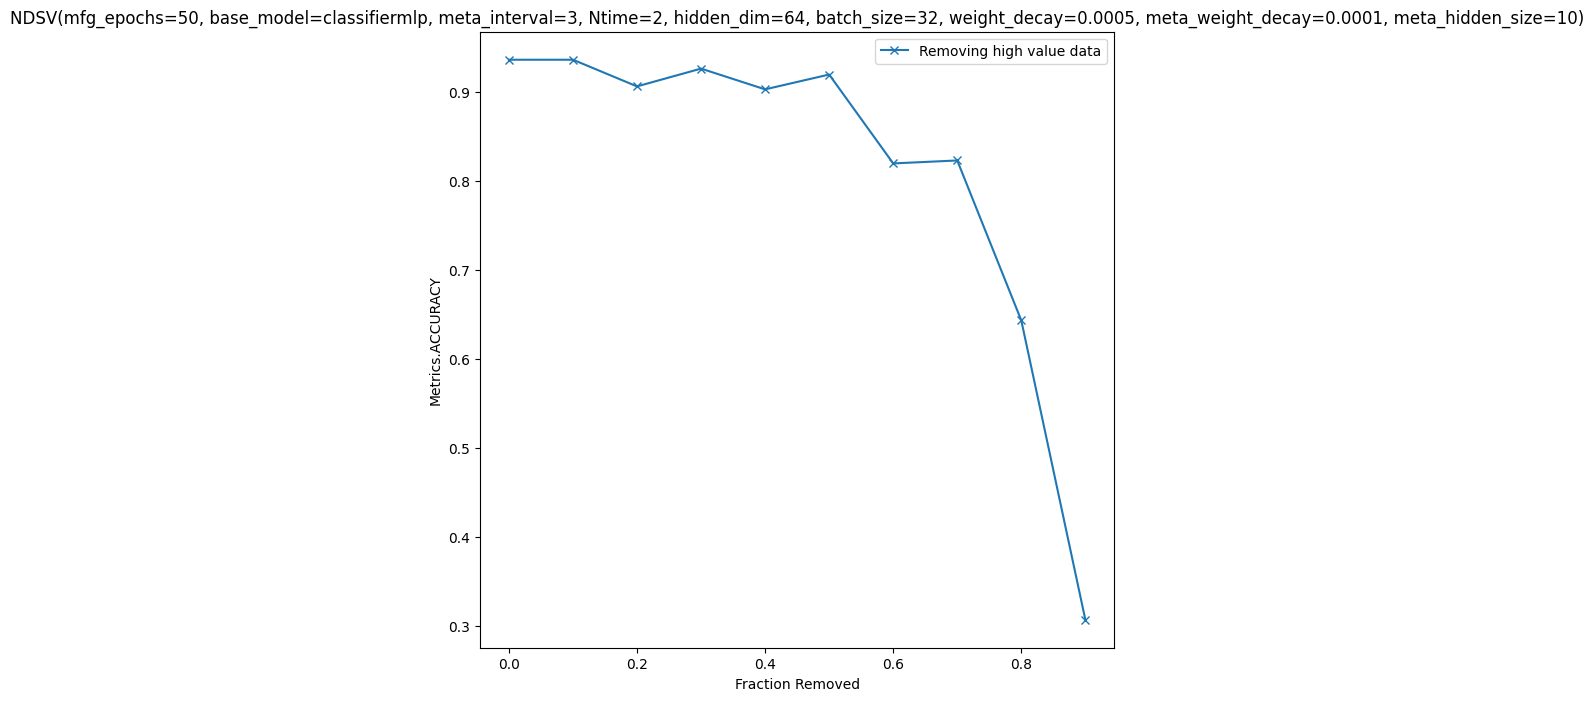

In [23]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

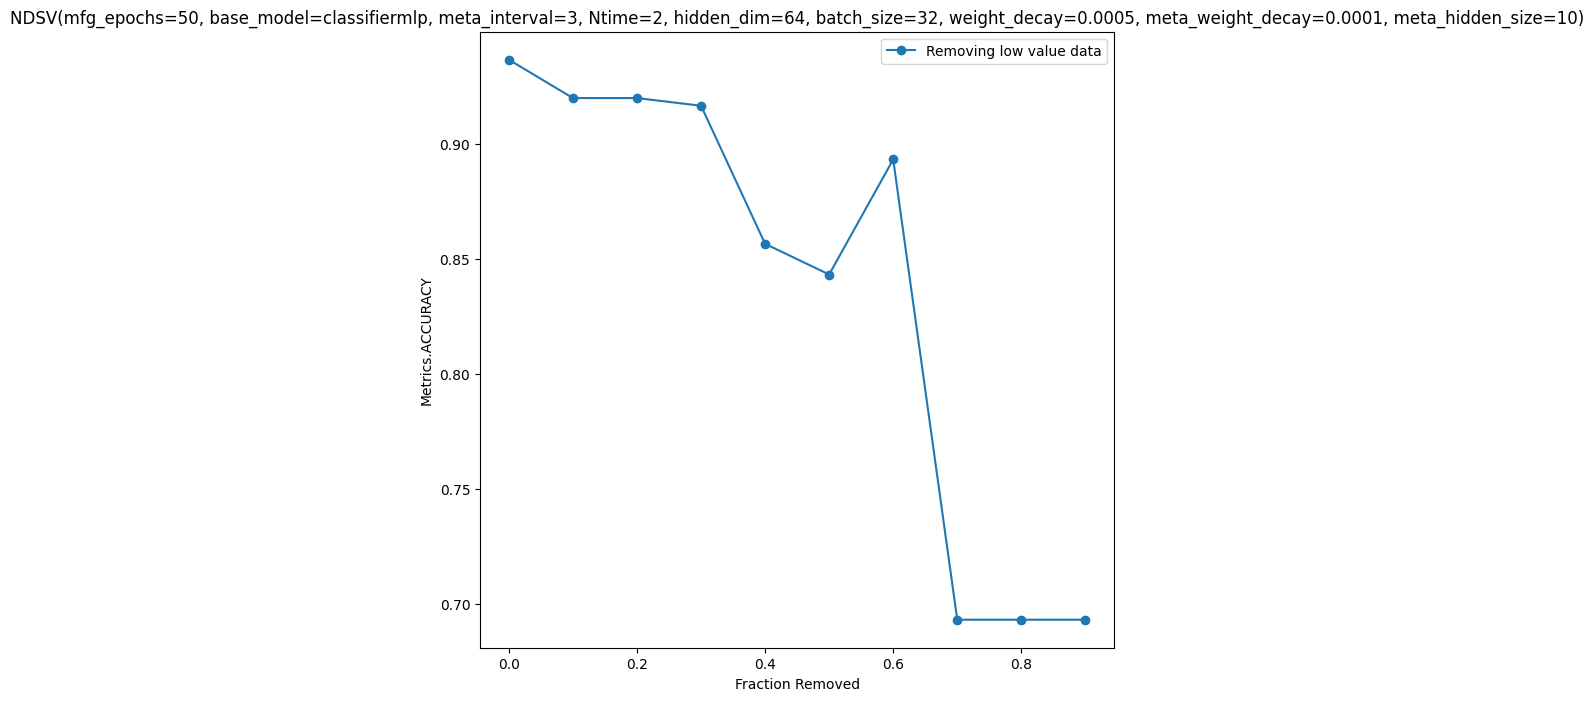

In [24]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

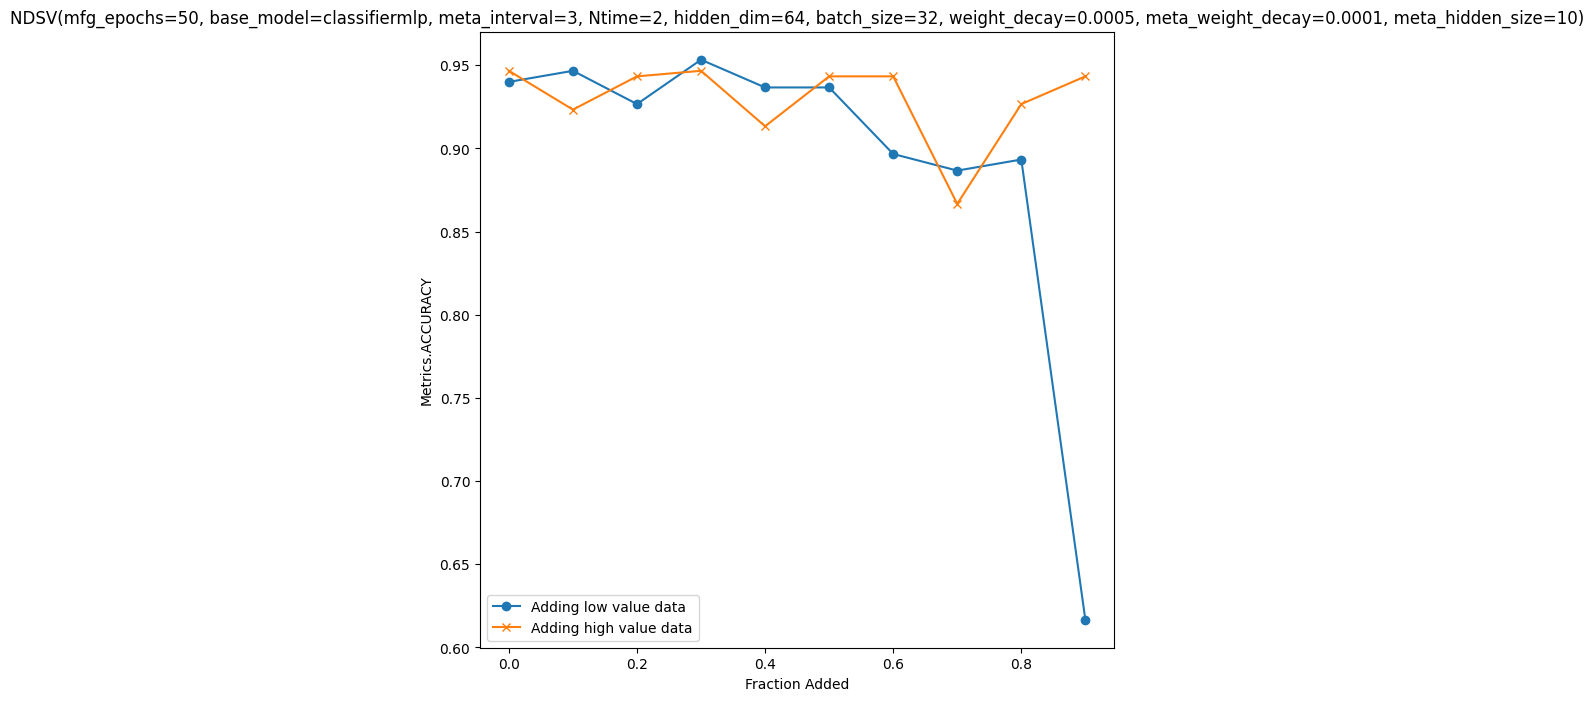

In [25]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

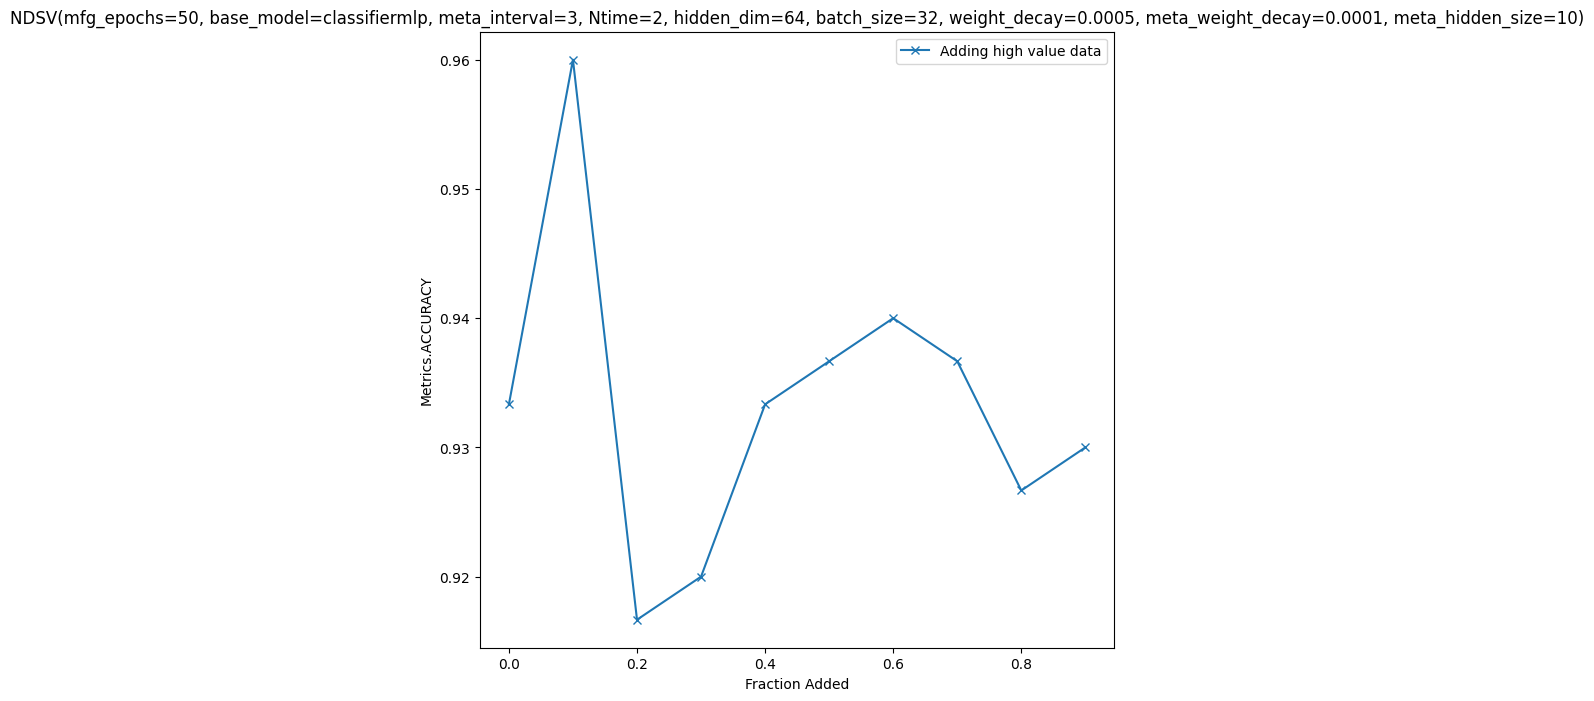

In [26]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

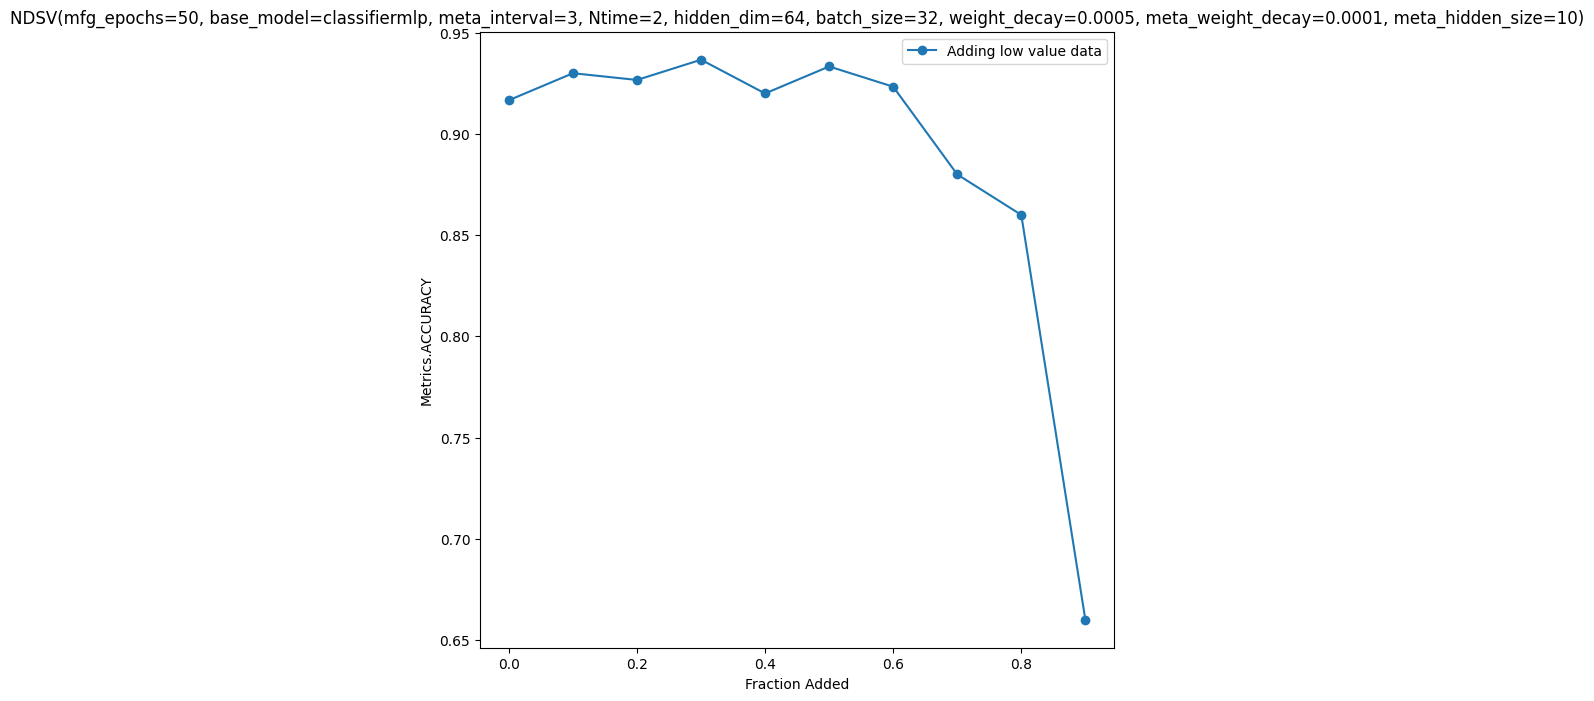

In [27]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)